In [10]:
import numpy as np
# pandas handles dataframes (exactly the same as tables in Matlab)
import pandas as pd
# matplotlib emulates Matlabs plotting functionality
import matplotlib.pyplot as plt
# stats models is a package that is going to perform the regression analysis
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score
import scipy
# os allows us to manipulate variables on out local machine, such as paths and environment variables
import os
# self explainatory, dates and times
from datetime import datetime, date
# a helper package to help us iterate over objects
import itertools
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# np.set_printoptions(threshold=np.inf)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
from sklearn.preprocessing import normalize

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.sparse import csr_matrix
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 


In [92]:
movies = pd.read_csv(r'D:\Assignment_1B_Data\Data\Q2\movies.csv')
ratings = pd.read_csv(r'D:\Assignment_1B_Data\Data\Q2\ratings.csv')
del ratings['timestamp']
movieRating = ratings.merge(movies, left_on='movieId', right_on='movieId')
movieRating


,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...
100831,610,160341,2.5,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,Blair Witch (2016),Horror|Thriller


In [93]:
from sklearn.cluster import KMeans

In [94]:
ratings_title = pd.merge(ratings, movies[['movieId', 'title']], on='movieId' )
user_movie_ratings = pd.pivot_table(ratings_title, index='userId', columns= 'title', values='rating')
user_movie_ratings

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


In [95]:
def get_genre_ratings(ratings, movies, genres, column_names):
    genre_ratings = pd.DataFrame()
    for genre in genres:        
        genre_movies = movies[movies['genres'].str.contains(genre) ]
        avg_genre_votes_per_user = ratings[ratings['movieId'].isin(genre_movies['movieId'])].loc[:, ['userId', 'rating']].groupby(['userId'])['rating'].mean().round(2)
        
        genre_ratings = pd.concat([genre_ratings, avg_genre_votes_per_user], axis=1)
        
    genre_ratings.columns = column_names
    return genre_ratings

In [96]:
genres_type = []
for genres_ in movies['genres']:
    genres_type.extend(genres_.split("|"))

genres_type = set(genres_type)
genres_type = list(genres_type)
genre_ratings = get_genre_ratings(ratings, movies, genres_type, genres_type)
pd.set_option('display.max_rows', 500)
# genre_ratings['Children/Animation'] = genre_ratings[['Children', 'Animation']].mean(axis=1)
# genre_ratings['Thriller/Horror'] = genre_ratings[['Thriller', 'Horror']].mean(axis=1)
# genre_ratings = genre_ratings.dropna(thresh=15)
genre_ratings.shape


c:\users\callum\appdata\local\programs\python\python37\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


(610, 20)

In [97]:
genre_ratings.isna().sum()

Comedy                  1
(no genres listed)    584
Adventure               4
Western               190
Thriller                1
Sci-Fi                  5
Horror                 75
Animation              83
War                    59
Musical               140
Film-Noir             371
Children               51
Crime                   7
Drama                   0
IMAX                  152
Fantasy                27
Action                  2
Mystery                30
Documentary           387
Romance                 4
dtype: int64

In [98]:
del genre_ratings['(no genres listed)']
del genre_ratings['Documentary']
del genre_ratings['Film-Noir']
del genre_ratings['Western']
del genre_ratings['IMAX']
del genre_ratings['Musical']

genre_ratings.isna().sum()

Comedy        1
Adventure     4
Thriller      1
Sci-Fi        5
Horror       75
Animation    83
War          59
Children     51
Crime         7
Drama         0
Fantasy      27
Action        2
Mystery      30
Romance       4
dtype: int64

In [99]:
genre_ratings = genre_ratings.fillna(0)

genre_ratings.head(200)

,Comedy,Adventure,Thriller,Sci-Fi,Horror,Animation,War,Children,Crime,Drama,Fantasy,Action,Mystery,Romance
1,4.28,4.39,4.15,4.22,3.47,4.69,4.50,4.55,4.36,4.53,4.30,4.32,4.17,4.31
2,4.00,4.17,3.70,3.88,3.00,0.00,4.50,0.00,3.80,3.88,0.00,3.95,4.00,4.50
3,1.00,2.73,4.14,4.20,4.69,0.50,0.50,0.50,0.50,0.75,3.38,3.57,5.00,0.50
4,3.51,3.66,3.55,2.83,4.25,4.00,3.57,3.80,3.81,3.48,3.68,3.32,3.48,3.38
5,3.47,3.25,3.56,2.50,3.00,4.33,3.33,4.11,3.83,3.80,4.14,3.11,4.00,3.09
6,3.37,3.89,3.54,3.48,3.26,4.07,3.58,3.62,3.29,3.61,3.54,3.61,3.73,3.61
7,3.16,3.31,3.43,3.15,4.00,3.39,3.29,3.20,3.31,3.13,3.07,3.26,3.18,2.65
8,3.21,3.55,3.75,3.25,4.50,5.00,3.67,4.25,3.89,3.79,3.25,3.33,4.00,3.50
9,3.67,3.80,2.55,3.00,1.80,4.00,3.50,4.00,3.14,3.43,5.00,3.12,4.00,3.17
10,3.27,3.58,3.08,2.00,1.75,3.87,3.75,3.61,3.12,3.15,3.44,3.50,2.17,3.33


In [100]:
sse = []
k_rng = range(1,50)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(genre_ratings)
    sse.append(km.inertia_)

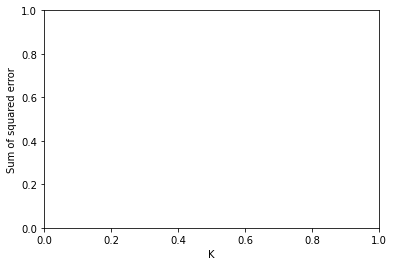

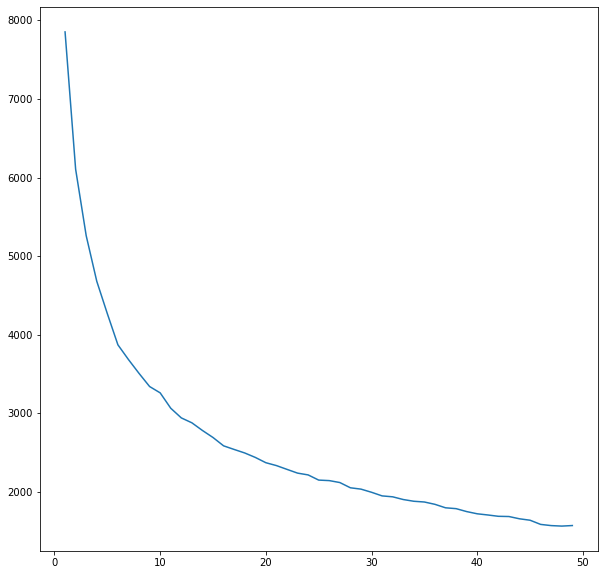

In [101]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.figure(figsize=(10,10))
plt.plot(k_rng,sse)

In [114]:
sse = []
k_rng = range(1,50)
from sklearn.metrics import silhouette_score
for n_clusters in k_rng:
    clusterer = KMeans(n_clusters=n_clusters, random_state =6)
    km = KMeans(n_clusters=k)
    km.fit(genre_ratings)
    preds = km.labels_
    centers = km.cluster_centers_

    score = silhouette_score(genre_ratings, preds)
    sse.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 1, silhouette score is 0.1522118748480799)
For n_clusters = 2, silhouette score is 0.15289237695022573)
For n_clusters = 3, silhouette score is 0.14813400334127613)
For n_clusters = 4, silhouette score is 0.1434771700099456)
For n_clusters = 5, silhouette score is 0.1539208643383902)
For n_clusters = 6, silhouette score is 0.15732177980019144)
For n_clusters = 7, silhouette score is 0.14913930985035573)
For n_clusters = 8, silhouette score is 0.14394574483893668)
For n_clusters = 9, silhouette score is 0.14268249736795305)
For n_clusters = 10, silhouette score is 0.14064790705865496)
For n_clusters = 11, silhouette score is 0.14939295749082143)
For n_clusters = 12, silhouette score is 0.16915190287583773)
For n_clusters = 13, silhouette score is 0.13887401491895585)
For n_clusters = 14, silhouette score is 0.17561985046826173)
For n_clusters = 15, silhouette score is 0.16682347229366015)
For n_clusters = 16, silhouette score is 0.15012933204974754)
For n_clusters = 17,

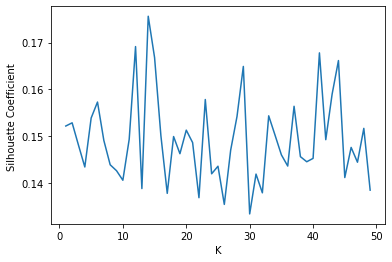

In [116]:
plt.xlabel('K')
plt.ylabel('Silhouette Coefficient ')
plt.plot(k_rng,sse)

In [123]:
km = KMeans(n_clusters=14, random_state = 3)
y_predicted = km.fit_predict(genre_ratings)
genre_ratings['cluster']=y_predicted
pd.set_option('display.max_rows', 500)

genre_ratings.head(500)

,Comedy,Adventure,Thriller,Sci-Fi,Horror,Animation,War,Children,Crime,Drama,Fantasy,Action,Mystery,Romance,cluster
1,4.28,4.39,4.15,4.22,3.47,4.69,4.50,4.55,4.36,4.53,4.30,4.32,4.17,4.31,0
2,4.00,4.17,3.70,3.88,3.00,0.00,4.50,0.00,3.80,3.88,0.00,3.95,4.00,4.50,11
3,1.00,2.73,4.14,4.20,4.69,0.50,0.50,0.50,0.50,0.75,3.38,3.57,5.00,0.50,3
4,3.51,3.66,3.55,2.83,4.25,4.00,3.57,3.80,3.81,3.48,3.68,3.32,3.48,3.38,1
5,3.47,3.25,3.56,2.50,3.00,4.33,3.33,4.11,3.83,3.80,4.14,3.11,4.00,3.09,1
6,3.37,3.89,3.54,3.48,3.26,4.07,3.58,3.62,3.29,3.61,3.54,3.61,3.73,3.61,1
7,3.16,3.31,3.43,3.15,4.00,3.39,3.29,3.20,3.31,3.13,3.07,3.26,3.18,2.65,1
8,3.21,3.55,3.75,3.25,4.50,5.00,3.67,4.25,3.89,3.79,3.25,3.33,4.00,3.50,7
9,3.67,3.80,2.55,3.00,1.80,4.00,3.50,4.00,3.14,3.43,5.00,3.12,4.00,3.17,10
10,3.27,3.58,3.08,2.00,1.75,3.87,3.75,3.61,3.12,3.15,3.44,3.50,2.17,3.33,10


In [124]:
KMeans_cluster_centroids = genre_ratings.groupby(['cluster'])[genre_ratings.columns].mean()
del KMeans_cluster_centroids['cluster']
KMeans_cluster_centroids

,Comedy,Adventure,Thriller,Sci-Fi,Horror,Animation,War,Children,Crime,Drama,Fantasy,Action,Mystery,Romance
cluster,,,,,,,,,,,,,,
0,4.290227,4.351591,4.314545,4.292045,4.177955,4.433864,4.407727,4.407955,4.329318,4.412955,4.389545,4.321136,4.458409,4.379091
1,3.393000,3.467083,3.553917,3.430583,3.523083,3.509000,3.747167,3.225417,3.670167,3.666250,3.413667,3.446333,3.674417,3.474500
2,3.640000,3.773158,3.406842,3.487368,0.052632,4.035263,0.157895,3.984211,3.487895,3.588421,3.832632,3.552632,3.501579,3.557368
3,2.674565,2.435435,2.569348,2.347391,2.093261,1.673478,2.471304,1.911739,2.560870,2.810000,2.291522,2.449130,2.343043,2.582609
4,3.486667,2.697778,4.074444,3.781111,0.444444,0.333333,3.948889,0.555556,4.061111,4.107778,4.032222,3.727778,3.650000,3.310000
5,3.607778,3.716667,3.396111,3.400556,3.078333,3.473333,3.948889,3.503333,3.810556,3.701111,3.392778,3.552222,0.055556,3.546111
6,3.611429,3.732857,3.684762,3.523810,3.361905,0.119048,3.967619,3.365714,3.720952,3.820476,3.626667,3.490476,3.391429,3.697143
7,3.834255,3.855674,3.917305,3.796809,3.856525,3.959787,4.200922,3.870851,3.992553,4.015461,3.774894,3.792837,4.043759,3.913262
8,3.700833,4.080417,3.989167,3.880833,3.817500,0.065000,3.607083,0.094583,4.162500,4.031250,3.750417,4.079583,3.523333,3.630417


In [125]:
genre_ratings.loc[ 42 , "cluster"]

1

In [126]:
genre_ratings.loc[ 314 , "cluster"]

10

In [127]:
genre_ratings.loc[444 , "cluster"]

7

In [139]:
def show_cluster_rankings(KMeans_cluster_centroids, cluster_num):
    
    KMeans_cluster_centroids = pd.DataFrame(KMeans_cluster_centroids)
    ranked = KMeans_cluster_centroids.loc[cluster_num,:]
    ranked = ranked.T
    return ranked.sort_values(ascending=False)
for i in range(0, 14):
    print("Cluster: ", i)
    print(show_cluster_rankings(KMeans_cluster_centroids, i))
    print("\n")



# ranked.sort(ascending=False)

Cluster:  0
Mystery      4.458409
Animation    4.433864
Drama        4.412955
Children     4.407955
War          4.407727
Fantasy      4.389545
Romance      4.379091
Adventure    4.351591
Crime        4.329318
Action       4.321136
Thriller     4.314545
Sci-Fi       4.292045
Comedy       4.290227
Horror       4.177955
Name: 0, dtype: float64


Cluster:  1
War          3.747167
Mystery      3.674417
Crime        3.670167
Drama        3.666250
Thriller     3.553917
Horror       3.523083
Animation    3.509000
Romance      3.474500
Adventure    3.467083
Action       3.446333
Sci-Fi       3.430583
Fantasy      3.413667
Comedy       3.393000
Children     3.225417
Name: 1, dtype: float64


Cluster:  2
Animation    4.035263
Children     3.984211
Fantasy      3.832632
Adventure    3.773158
Comedy       3.640000
Drama        3.588421
Romance      3.557368
Action       3.552632
Mystery      3.501579
Crime        3.487895
Sci-Fi       3.487368
Thriller     3.406842
War          0.157895
Horror    

In [134]:
genre_ratings

,Comedy,Adventure,Thriller,Sci-Fi,Horror,Animation,War,Children,Crime,Drama,Fantasy,Action,Mystery,Romance,cluster
1,4.28,4.39,4.15,4.22,3.47,4.69,4.50,4.55,4.36,4.53,4.30,4.32,4.17,4.31,0
2,4.00,4.17,3.70,3.88,3.00,0.00,4.50,0.00,3.80,3.88,0.00,3.95,4.00,4.50,11
3,1.00,2.73,4.14,4.20,4.69,0.50,0.50,0.50,0.50,0.75,3.38,3.57,5.00,0.50,3
4,3.51,3.66,3.55,2.83,4.25,4.00,3.57,3.80,3.81,3.48,3.68,3.32,3.48,3.38,1
5,3.47,3.25,3.56,2.50,3.00,4.33,3.33,4.11,3.83,3.80,4.14,3.11,4.00,3.09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,3.57,3.50,3.53,3.56,3.35,3.71,3.79,3.45,3.65,3.79,3.60,3.18,3.79,3.74,1
607,3.33,3.47,4.11,3.25,4.11,3.33,4.17,3.42,3.81,4.01,3.57,3.72,4.65,3.52,7
608,2.74,3.22,3.54,3.30,3.32,3.12,3.58,2.46,3.61,3.44,3.00,3.33,3.55,2.89,10
609,3.29,3.20,3.29,3.00,3.50,3.00,3.50,3.00,3.50,3.37,3.00,3.09,0.00,3.20,5


In [63]:
del genre_ratings['cluster']

In [137]:
genre_ratings.loc[44,:]

Comedy        3.39
Adventure     3.45
Thriller      3.18
Sci-Fi        3.11
Horror        2.33
Animation     2.75
War           0.00
Children      2.33
Crime         4.00
Drama         3.58
Fantasy       2.33
Action        3.45
Mystery       3.00
Romance       3.38
cluster      13.00
Name: 44, dtype: float64

In [138]:
genre_ratings.loc[314,:]

Comedy        3.06
Adventure     2.84
Thriller      2.71
Sci-Fi        2.96
Horror        2.83
Animation     3.12
War           3.71
Children      3.15
Crime         3.00
Drama         3.40
Fantasy       3.21
Action        2.82
Mystery       3.00
Romance       3.36
cluster      10.00
Name: 314, dtype: float64

In [140]:
genre_ratings.loc[444,:]

Comedy       3.85
Adventure    2.75
Thriller     3.88
Sci-Fi       3.20
Horror       4.50
Animation    4.00
War          4.25
Children     3.67
Crime        4.06
Drama        4.05
Fantasy      4.20
Action       3.50
Mystery      4.00
Romance      4.12
cluster      7.00
Name: 444, dtype: float64

For n_clusters = 2, silhouette score is 0.21010503723464963)
For n_clusters = 3, silhouette score is 0.22060008020824023)
For n_clusters = 4, silhouette score is 0.20451756498124476)
For n_clusters = 5, silhouette score is 0.18200580803918548)
For n_clusters = 6, silhouette score is 0.08068266225492274)
For n_clusters = 7, silhouette score is 0.049227790639458535)
For n_clusters = 8, silhouette score is 0.0385921702853293)
For n_clusters = 9, silhouette score is 0.04422216911222896)
For n_clusters = 10, silhouette score is 0.08019514262001312)
For n_clusters = 11, silhouette score is 0.11480429622196046)
For n_clusters = 12, silhouette score is 0.038983318604052575)
For n_clusters = 13, silhouette score is 0.034407306889427156)
For n_clusters = 14, silhouette score is 0.04655686031019625)
For n_clusters = 15, silhouette score is 0.08949169892668975)
For n_clusters = 16, silhouette score is 0.08482314746702976)
For n_clusters = 17, silhouette score is 0.028411615144575592)
For n_cluster

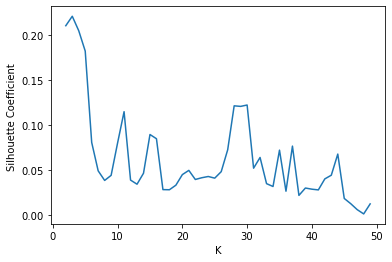

In [76]:
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm
from matplotlib.patches import Ellipse
# gmm = GaussianMixture(2, random_state=4)
# gmm.fit(genre_ratings)
sse = []
k_rng = range(2,50)
from sklearn.metrics import silhouette_score
for n_clusters in k_rng:
    gmm = GaussianMixture(n_clusters, random_state=5)
    gmm.fit(genre_ratings)
    preds = gmm.predict(genre_ratings)
    centers = gmm.means_

    score = silhouette_score(genre_ratings, preds)
    sse.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
plt.xlabel('K')
plt.ylabel('Silhouette Coefficient ')
plt.plot(k_rng,sse)

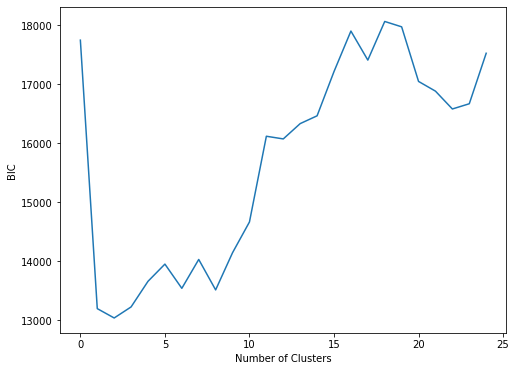

In [77]:
bics = []
for i in range (25):
    gmm = GaussianMixture(i+1, random_state=4)
    gmm.fit(genre_ratings)
    bics.append(gmm.bic(genre_ratings))
    
fig = plt.figure(figsize=[8, 6])
ax = fig.add_subplot(1, 1, 1)
ax.plot(bics)
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('BIC');

In [44]:
np.argmin(bics) + 1

3

In [67]:
gmm_Best = GaussianMixture(3, random_state=4, )
gmm_Best.fit(genre_ratings)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=4, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [68]:
columns_genres = pd.DataFrame()
columns_genres = genre_ratings.columns.to_numpy()
# columns_genres = np.delete(columns_genres, 14)
gmm_Best = gmm_Best.means_
gmm_Best = pd.DataFrame(gmm_Best)

gmm_Best.columns = columns_genres
show_cluster_rankings(gmm_Best, 0)

Drama        3.699675
Adventure    3.589878
Crime        3.583392
Romance      3.559859
Comedy       3.557314
Thriller     3.495095
Animation    3.480911
Action       3.439502
Sci-Fi       3.423922
Fantasy      3.348968
Children     3.323028
Mystery      3.238492
War          2.810264
Horror       2.164715
Name: 0, dtype: float64

In [69]:
show_cluster_rankings(gmm_Best, 1)

War          3.903384
Mystery      3.782386
Drama        3.778340
Crime        3.753163
Animation    3.725462
Romance      3.670644
Thriller     3.653617
Adventure    3.620945
Fantasy      3.614513
Children     3.591067
Comedy       3.576911
Action       3.573287
Sci-Fi       3.569029
Horror       3.534616
Name: 1, dtype: float64

In [70]:
show_cluster_rankings(gmm_Best, 2)

Crime        3.861830
Drama        3.800726
Thriller     3.759312
Action       3.671910
Romance      3.516071
Comedy       3.512670
Mystery      3.506211
Adventure    3.492370
War          3.426676
Sci-Fi       3.420778
Horror       2.982055
Fantasy      2.739466
Children     1.314842
Animation    0.011986
Name: 2, dtype: float64

In [79]:
# genre_ratings.loc[ 42 , "cluster"]
gmm_Best

,Comedy,Adventure,Thriller,Sci-Fi,Horror,Animation,War,Children,Crime,Drama,Fantasy,Action,Mystery,Romance
0,3.557314,3.589878,3.495095,3.423922,2.164715,3.480911,2.810264,3.323028,3.583392,3.699675,3.348968,3.439502,3.238492,3.559859
1,3.576911,3.620945,3.653617,3.569029,3.534616,3.725462,3.903384,3.591067,3.753163,3.778340,3.614513,3.573287,3.782386,3.670644
2,3.512670,3.492370,3.759312,3.420778,2.982055,0.011986,3.426676,1.314842,3.861830,3.800726,2.739466,3.671910,3.506211,3.516071
